**Importing** **Data**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving seattle-weather.xlsx to seattle-weather.xlsx


In [ ]:
import pandas as pd
import io

# Assuming your file is named 'your_file.csv'
df = pd.read_excel(io.BytesIO(uploaded['seattle-weather.xlsx']))

In [ ]:
print(df.head())

        Date  Precipitation  Temp Max  Temp Min  Wind  Weather
0 2012-01-01            0.0      12.8       5.0   4.7  drizzle
1 2012-01-02           10.9      10.6       2.8   4.5     rain
2 2012-01-03            0.8      11.7       7.2   2.3     rain
3 2012-01-04           20.3      12.2       5.6   4.7     rain
4 2012-01-05            1.3       8.9       2.8   6.1     rain


**Transforming into Monthyl Data**

In [ ]:
import pandas as pd
import io

# Load the data
df = pd.read_excel(io.BytesIO(uploaded['seattle-weather.xlsx']))

# Ensure 'Date' is a datetime column
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Define aggregation functions for each column
aggregation_functions = {
    'Precipitation': 'mean',
    'Temp Max': 'mean',
    'Temp Min': 'mean',
    'Wind': 'mean',
    'Weather': lambda x: x.mode()[0]  # Most frequent value
}

# Resample by month and aggregate
monthly_df = df.resample('M').agg(aggregation_functions)

# Create a 'Month' column in the desired format
monthly_df['Month'] = monthly_df.index.strftime('%b %Y')

# Reset index to have 'Date' as a column again
monthly_df.reset_index(inplace=True)

print(monthly_df.head())


        Date  Precipitation   Temp Max  Temp Min      Wind Weather     Month
0 2012-01-31       5.590323   7.054839  1.541935  3.900000    rain  Jan 2012
1 2012-02-29       3.182759   9.275862  3.203448  3.903448    rain  Feb 2012
2 2012-03-31       5.903226   9.554839  2.838710  4.248387    rain  Mar 2012
3 2012-04-30       2.270000  14.873333  5.993333  3.373333    rain  Apr 2012
4 2012-05-31       1.683871  17.661290  8.190323  3.354839    rain  May 2012


In [ ]:
monthly_df.shape
#Checking data structure, no. of columns and rows

(48, 7)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

**Scatterplot - Month & Precipitation**

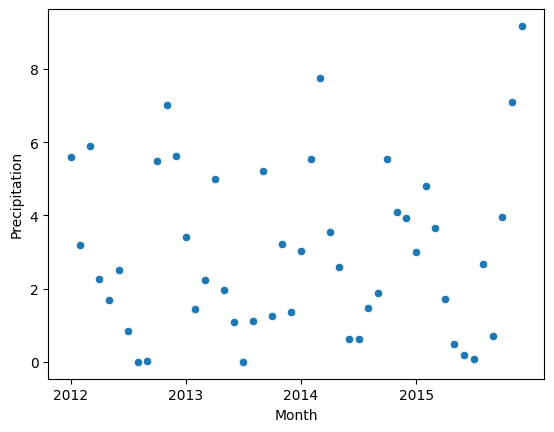

In [ ]:
# Create the scatter plot
sns.scatterplot(x='Month', y='Precipitation', data=monthly_df)

# Set x-axis labels to show only the years
# Convert 'Month' to datetime and extract the year
monthly_df['Year'] = pd.to_datetime(monthly_df['Month'], format='%b %Y').dt.year

# Set the x-ticks to be years only
plt.xticks(ticks=monthly_df.index[::12], labels=monthly_df['Year'][::12])  # Adjust `::12` based on frequency

# Show the plot
plt.show()


**Scatterplot - Month & Temp Max**

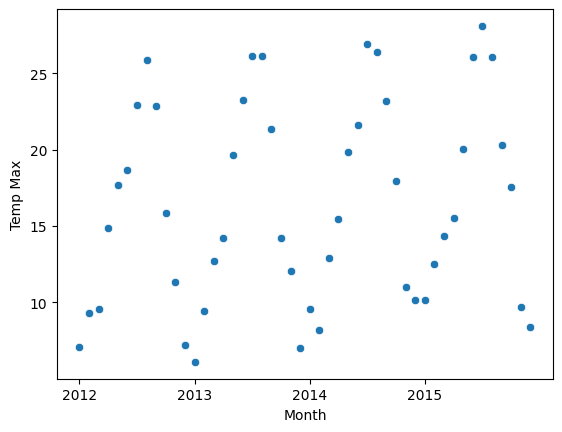

In [ ]:
# Create the scatter plot
sns.scatterplot(x='Month', y='Temp Max', data=monthly_df)

# Set x-axis labels to show only the years
# Convert 'Month' to datetime and extract the year
monthly_df['Year'] = pd.to_datetime(monthly_df['Month'], format='%b %Y').dt.year

# Set the x-ticks to be years only
plt.xticks(ticks=monthly_df.index[::12], labels=monthly_df['Year'][::12])  # Adjust `::12` based on frequency

# Show the plot
plt.show()


**Scatterplot - Month & Temp Min**

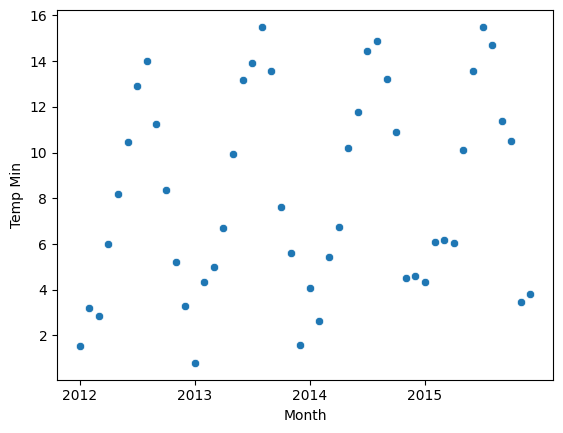

In [ ]:
# Create the scatter plot
sns.scatterplot(x='Month', y='Temp Min', data=monthly_df)

# Set x-axis labels to show only the years
# Convert 'Month' to datetime and extract the year
monthly_df['Year'] = pd.to_datetime(monthly_df['Month'], format='%b %Y').dt.year

# Set the x-ticks to be years only
plt.xticks(ticks=monthly_df.index[::12], labels=monthly_df['Year'][::12])  # Adjust `::12` based on frequency

# Show the plot
plt.show()


**Scatterplot - Month & Wind**

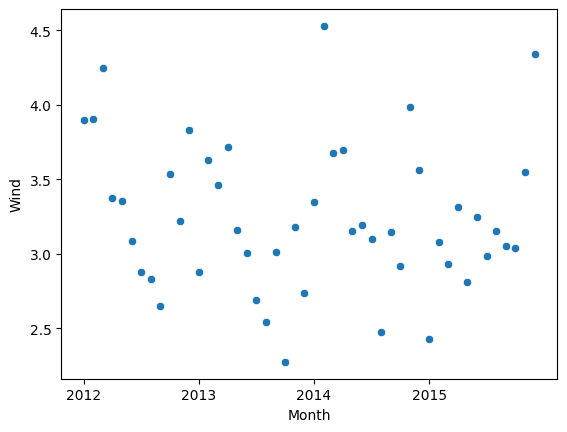

In [ ]:
# Create the scatter plot
sns.scatterplot(x='Month', y='Wind', data=monthly_df)

# Set x-axis labels to show only the years
# Convert 'Month' to datetime and extract the year
monthly_df['Year'] = pd.to_datetime(monthly_df['Month'], format='%b %Y').dt.year

# Set the x-ticks to be years only
plt.xticks(ticks=monthly_df.index[::12], labels=monthly_df['Year'][::12])  # Adjust `::12` based on frequency

# Show the plot
plt.show()


**Creating Lagged Precipitation - 1 Period Lag**

In [ ]:
monthly_df['Precipitation_lag'] = monthly_df['Precipitation'].shift(1)

# Display the first 5 rows of the Precipitation and Precipitation_lag columns
monthly_df[['Precipitation', 'Precipitation_lag']].head()


,Precipitation,Precipitation_lag
0,5.590323,NaN
1,3.182759,5.590323
2,5.903226,3.182759
3,2.270000,5.903226
4,1.683871,2.270000


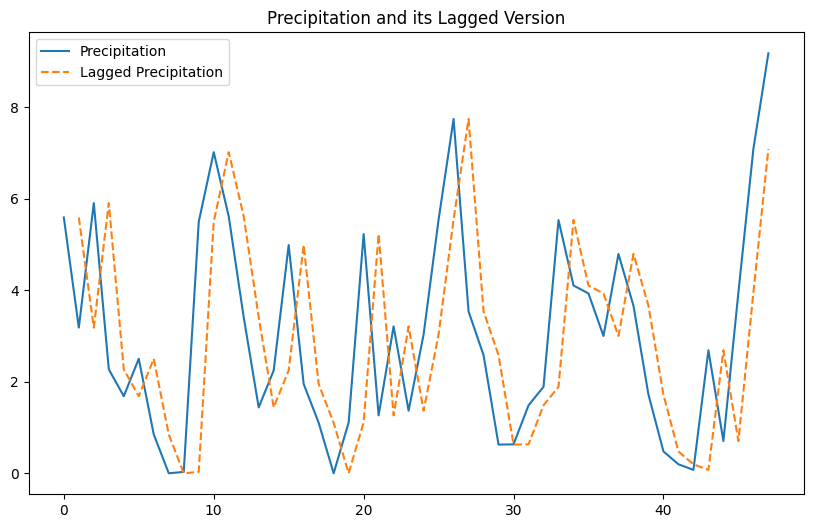

In [ ]:
# Plot meantemp and its lag
plt.figure(figsize=(10, 6))
plt.plot(monthly_df['Precipitation'], label='Precipitation')
plt.plot(monthly_df['Precipitation_lag'], label='Lagged Precipitation', linestyle='--')
plt.legend()
plt.title('Precipitation and its Lagged Version')
plt.show()

**Creating Lagged Precipitation - 2 Periods Lag**

In [ ]:
# Create lag variables for meantemp
monthly_df['Precipitation_lag1'] = monthly_df['Precipitation'].shift(1)  # 1-day lag
monthly_df['Precipitation_lag2'] = monthly_df['Precipitation'].shift(2)  # 2-day lag

# Display the first few rows to check the new columns
monthly_df[['Precipitation', 'Precipitation_lag1', 'Precipitation_lag2']].head()


,Precipitation,Precipitation_lag1,Precipitation_lag2
0,5.590323,NaN,NaN
1,3.182759,5.590323,NaN
2,5.903226,3.182759,5.590323
3,2.270000,5.903226,3.182759
4,1.683871,2.270000,5.903226


**Autocorrelation b/w Precipitation & its 1 Period Lag**

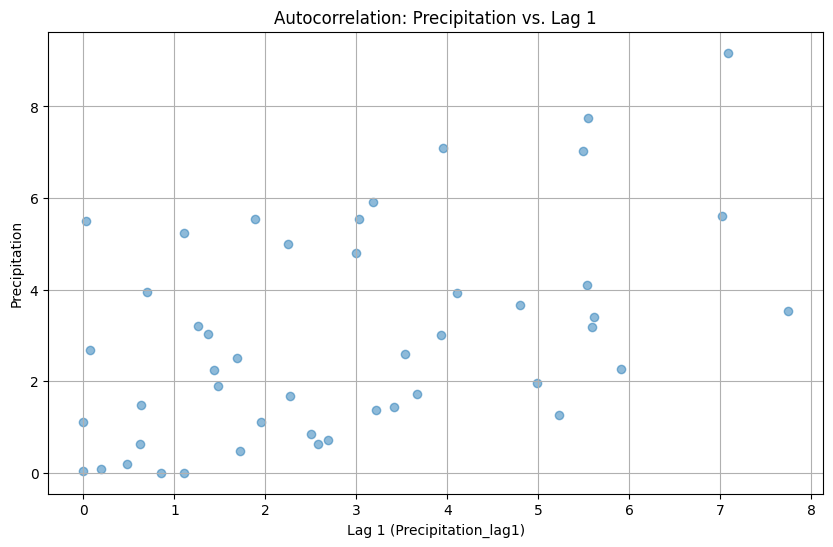

In [ ]:
# Plot meantemp and lag1
plt.figure(figsize=(10, 6))
plt.scatter(monthly_df['Precipitation_lag1'], monthly_df['Precipitation'], alpha=0.5)
plt.title('Autocorrelation: Precipitation vs. Lag 1')
plt.xlabel('Lag 1 (Precipitation_lag1)')
plt.ylabel('Precipitation')
plt.grid(True)
plt.show()

**Correlation between Precipitaion and its 1 period lag and 2 periods lag**

In [ ]:
# Calculate correlation coefficients
correlation_lag1 = monthly_df['Precipitation'].corr(monthly_df['Precipitation_lag1'])
correlation_lag2 = monthly_df['Precipitation'].corr(monthly_df['Precipitation_lag2'])

print(f'Correlation between Precipitaion and lag 1: {correlation_lag1}')
print(f'Correlation between Precipitaion and lag 2: {correlation_lag2}')

Correlation between Precipitaion and lag 1: 0.4809336957851587
Correlation between Precipitaion and lag 2: 0.048789425963417156


<Figure size 1000x600 with 0 Axes>

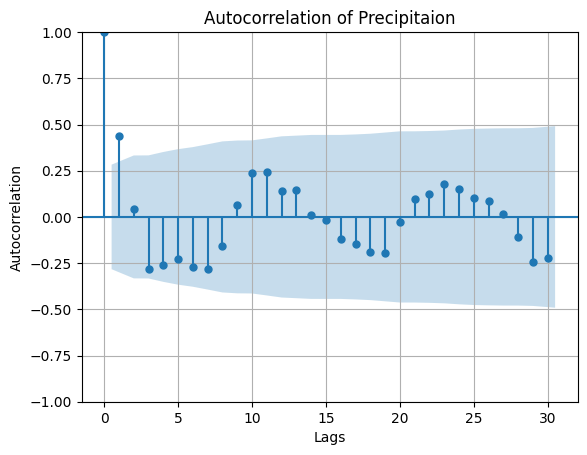

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
# Plot the autocorrelation for meantemp
plt.figure(figsize=(10, 6))
plot_acf(monthly_df['Precipitation'].dropna(), lags=30, alpha=0.05)
plt.title('Autocorrelation of Precipitaion')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

**Time Series Decomposition**

In [ ]:
print(monthly_df.index)

RangeIndex(start=0, stop=48, step=1)


In [ ]:
# Convert the 'Date' column (or another date column) to datetime and set it as the index
monthly_df['Date'] = pd.to_datetime(monthly_df['Date'], format='%Y-%m-%d')
monthly_df.set_index('Date', inplace=True)

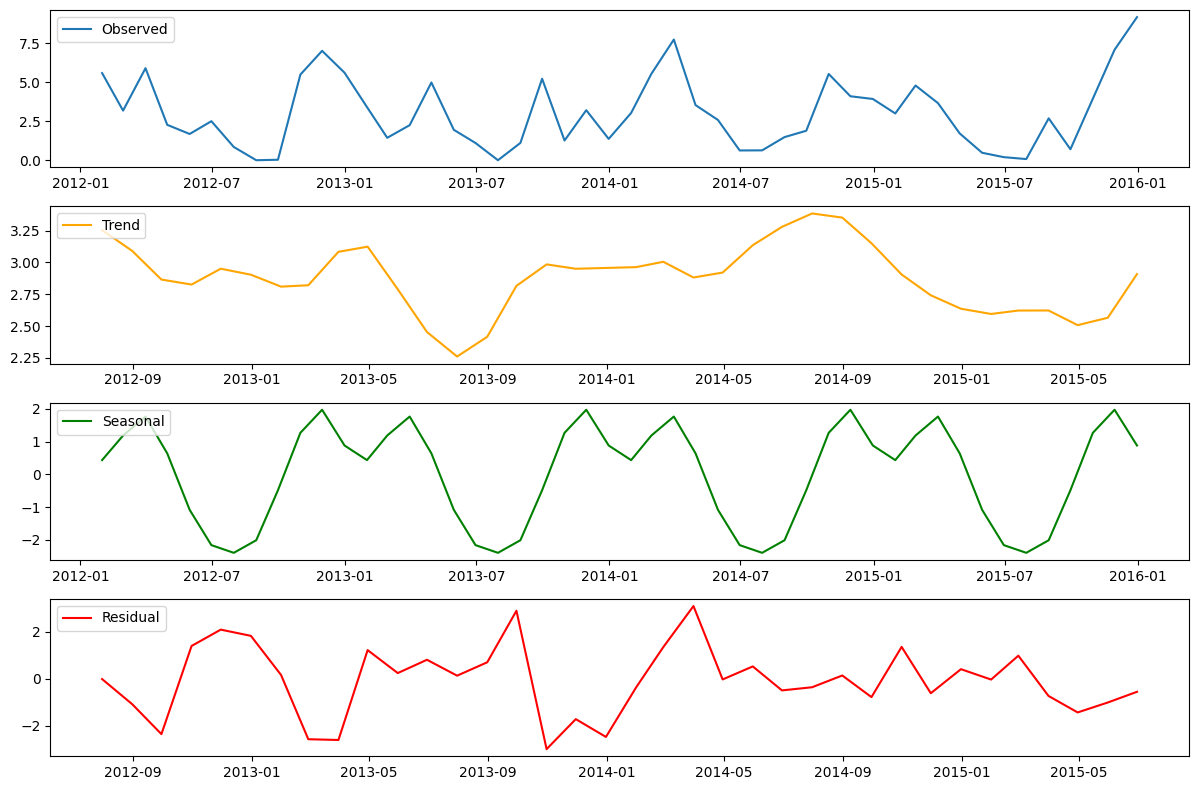

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Check if the 'Date' column exists and set it as an index after conversion
if 'Date' in monthly_df.columns:
    monthly_df['Date'] = pd.to_datetime(monthly_df['Date'], format='%Y-%m-%d')
    monthly_df.set_index('Date', inplace=True)

# Decompose the time series (assuming daily data and yearly seasonality)
result = seasonal_decompose(monthly_df['Precipitation'], model='additive', period=12)

# Plot the decomposition
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(result.observed, label='Observed')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(result.trend, label='Trend', color='orange')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(result.seasonal, label='Seasonal', color='green')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(result.resid, label='Residual', color='red')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


**Moving Average, Exp Smoothening & Double Exp Smoothening**

In [ ]:
window_size = 1  # Number of lags
monthly_df['moving_avg_Prec1'] = monthly_df['Precipitation'].rolling(window=window_size).mean()


In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Ensure 'Date' is in the index and set frequency to monthly
monthly_df.index = pd.to_datetime(monthly_df.index)
monthly_df = monthly_df.asfreq('M')

# Apply Single Exponential Smoothing
model = ExponentialSmoothing(monthly_df['Precipitation'], trend=None, seasonal=None)
fitted_model = model.fit()

# Add smoothed values to the DataFrame
monthly_df['single_exp_smooth_Prec'] = fitted_model.fittedvalues


In [ ]:
model = ExponentialSmoothing(monthly_df['Precipitation'], trend='add', seasonal=None)
fitted_model = model.fit()

monthly_df['double_exp_smooth_Prec'] = fitted_model.fittedvalues
print(monthly_df.head())

            Precipitation   Temp Max  Temp Min      Wind Weather     Month  \
Date                                                                         
2012-01-31       5.590323   7.054839  1.541935  3.900000    rain  Jan 2012   
2012-02-29       3.182759   9.275862  3.203448  3.903448    rain  Feb 2012   
2012-03-31       5.903226   9.554839  2.838710  4.248387    rain  Mar 2012   
2012-04-30       2.270000  14.873333  5.993333  3.373333    rain  Apr 2012   
2012-05-31       1.683871  17.661290  8.190323  3.354839    rain  May 2012   

            Year  Precipitation_lag  Precipitation_lag1  Precipitation_lag2  \
Date                                                                          
2012-01-31  2012                NaN                 NaN                 NaN   
2012-02-29  2012           5.590323            5.590323                 NaN   
2012-03-31  2012           3.182759            3.182759            5.590323   
2012-04-30  2012           5.903226            5.903226   

**Holt-Winters Seasonal**

In [ ]:
model = ExponentialSmoothing(monthly_df['Precipitation'], trend='add', seasonal='add', seasonal_periods=12)
fitted_model = model.fit()

monthly_df['holt_winters_smooth_Prec'] = fitted_model.fittedvalues


**Holt-Winters Non-Seasonal**

In [ ]:
# Fit the Holt-Winters non-seasonal model for monthly_df
model = ExponentialSmoothing(monthly_df['Precipitation'], trend='add', seasonal=None)
fitted_model = model.fit(smoothing_level=0.7, smoothing_trend=0.3)  # alpha and beta

# Add the fitted values (smoothed values) to monthly_df
monthly_df['holt_winters_non_seasonal_Prec'] = fitted_model.fittedvalues

# Verify the results
print(monthly_df.head())


            Precipitation   Temp Max  Temp Min      Wind Weather     Month  \
Date                                                                         
2012-01-31       5.590323   7.054839  1.541935  3.900000    rain  Jan 2012   
2012-02-29       3.182759   9.275862  3.203448  3.903448    rain  Feb 2012   
2012-03-31       5.903226   9.554839  2.838710  4.248387    rain  Mar 2012   
2012-04-30       2.270000  14.873333  5.993333  3.373333    rain  Apr 2012   
2012-05-31       1.683871  17.661290  8.190323  3.354839    rain  May 2012   

            Year  Precipitation_lag  Precipitation_lag1  Precipitation_lag2  \
Date                                                                          
2012-01-31  2012                NaN                 NaN                 NaN   
2012-02-29  2012           5.590323            5.590323                 NaN   
2012-03-31  2012           3.182759            3.182759            5.590323   
2012-04-30  2012           5.903226            5.903226   

**Plots**

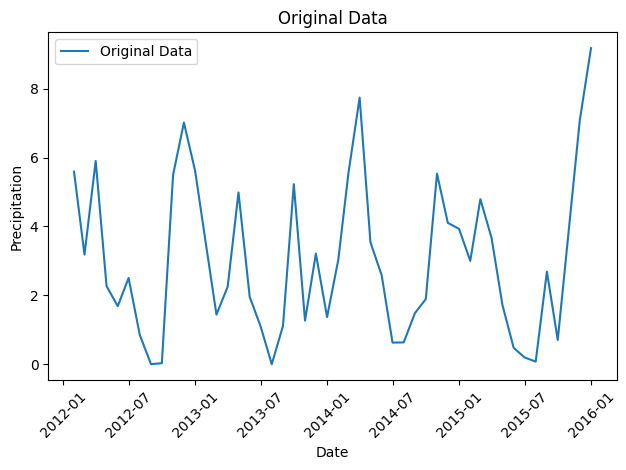

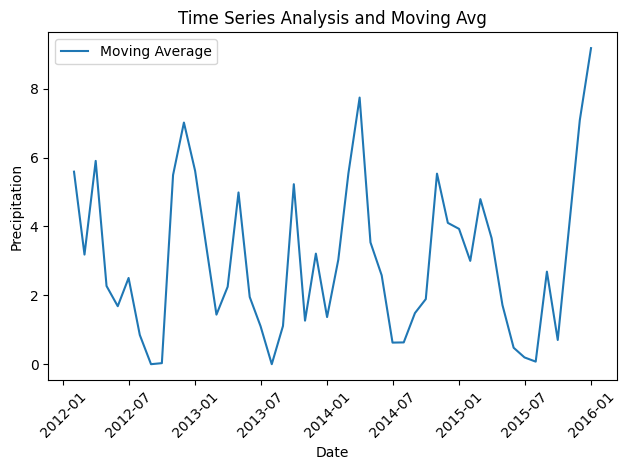

In [ ]:
import matplotlib.pyplot as plt

# Plot the original data
plt.plot(monthly_df.index, monthly_df['Precipitation'], label='Original Data')
plt.legend()
plt.title('Original Data')
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()       # Adjust layout to prevent overlap
plt.show()

# Plot the moving average, if present
if 'moving_avg_Prec1' in monthly_df.columns:
    plt.plot(monthly_df.index, monthly_df['moving_avg_Prec1'], label='Moving Average')
    plt.legend()
    plt.title('Time Series Analysis and Moving Avg')
    plt.xlabel('Date')
    plt.ylabel('Precipitation')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()       # Adjust layout to prevent overlap
    plt.show()



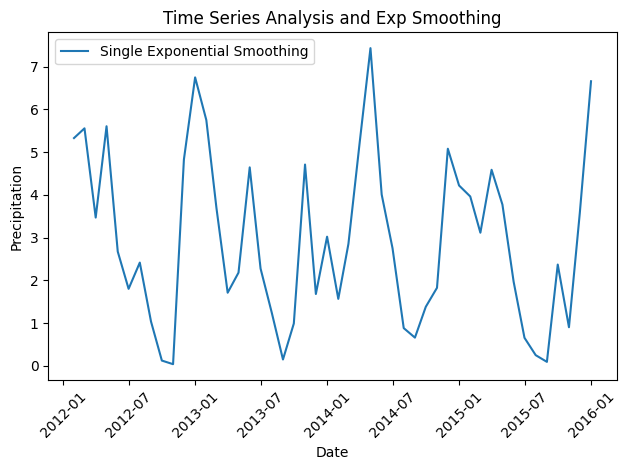

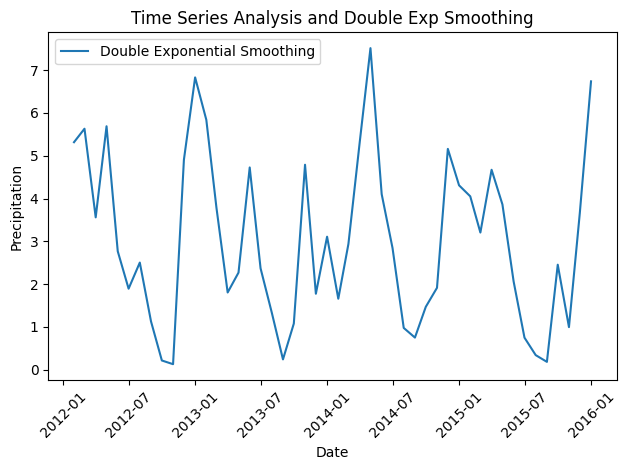

In [ ]:
 # Plot the single exponential smoothing, if present
if 'single_exp_smooth_Prec' in monthly_df.columns:
    plt.plot(monthly_df.index, monthly_df['single_exp_smooth_Prec'], label='Single Exponential Smoothing')
    plt.legend()
    plt.title('Time Series Analysis and Exp Smoothing')
    plt.xlabel('Date')
    plt.ylabel('Precipitation')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()       # Adjust layout to prevent overlap
    plt.show()

  #Plot the double exponential smoothing, if present
if 'double_exp_smooth_Prec' in monthly_df.columns:
    plt.plot(monthly_df.index, monthly_df['double_exp_smooth_Prec'], label='Double Exponential Smoothing')
    plt.legend()
    plt.title('Time Series Analysis and Double Exp Smoothing')
    plt.xlabel('Date')
    plt.ylabel('Precipitation')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()       # Adjust layout to prevent overlap
    plt.show()


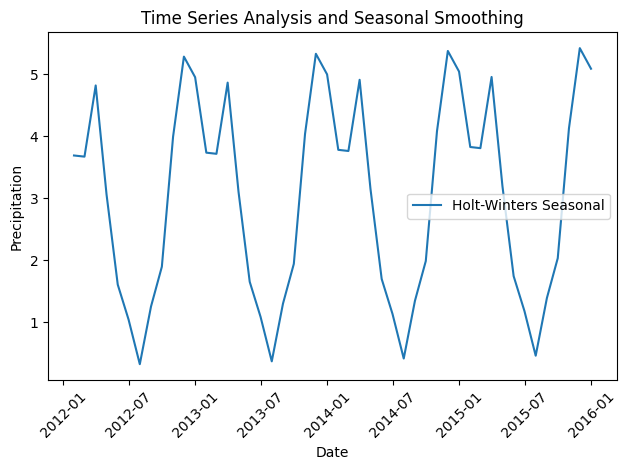

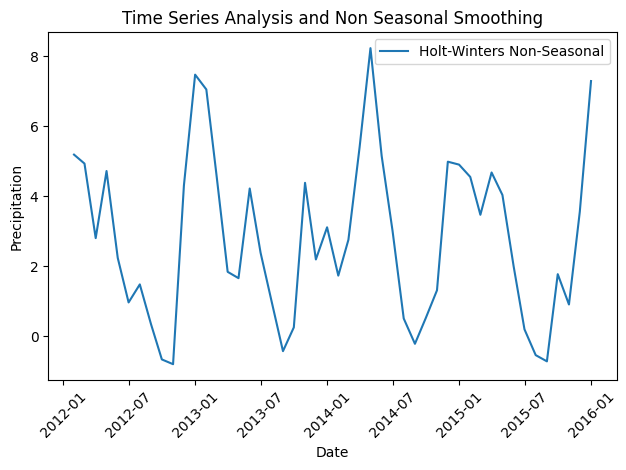

In [ ]:
# Plot the Holt-Winters seasonal smoothing, if present
if 'holt_winters_smooth_Prec' in monthly_df.columns:
    plt.plot(monthly_df.index, monthly_df['holt_winters_smooth_Prec'], label='Holt-Winters Seasonal')
    plt.legend()
    plt.title('Time Series Analysis and Seasonal Smoothing')
    plt.xlabel('Date')
    plt.ylabel('Precipitation')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()       # Adjust layout to prevent overlap
    plt.show()

# Plot the Holt-Winters non-seasonal smoothing, if present
if 'holt_winters_non_seasonal_Prec' in monthly_df.columns:
    plt.plot(monthly_df.index, monthly_df['holt_winters_non_seasonal_Prec'], label='Holt-Winters Non-Seasonal')
    plt.legend()
    plt.title('Time Series Analysis and Non Seasonal Smoothing')
    plt.xlabel('Date')
    plt.ylabel('Precipitation')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()       # Adjust layout to prevent overlap
    plt.show()


**Stationarity**

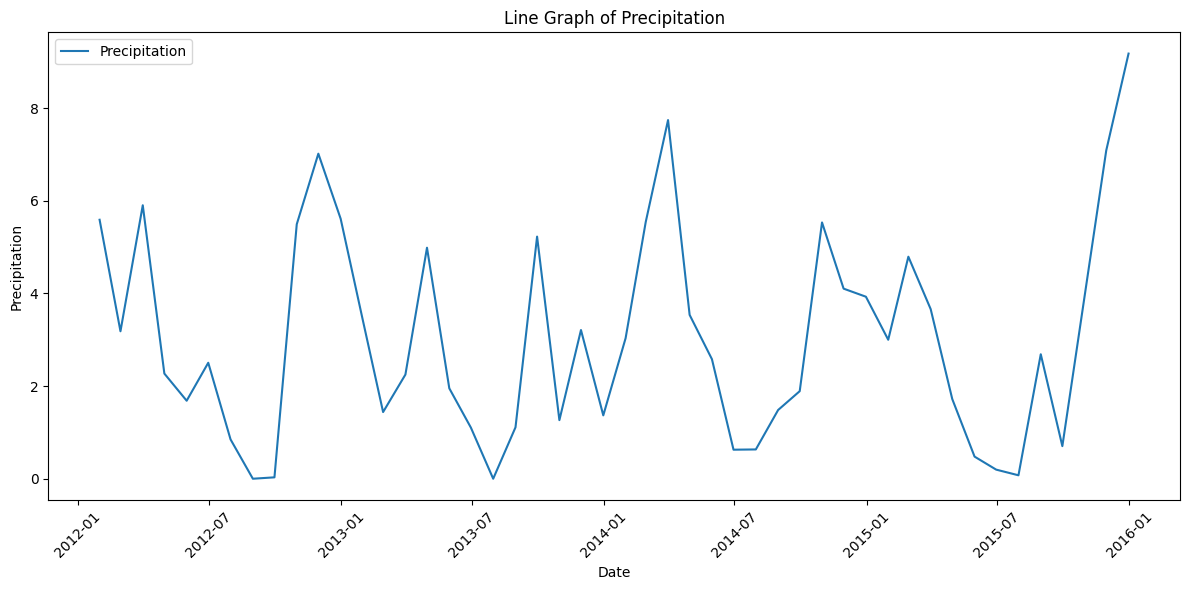

In [ ]:
# Plot the original data
plt.figure(figsize=(12, 6))
plt.plot(monthly_df.index, monthly_df['Precipitation'], label='Precipitation')
plt.title('Line Graph of Precipitation')
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


*Correlogram (ACF and PACF)*

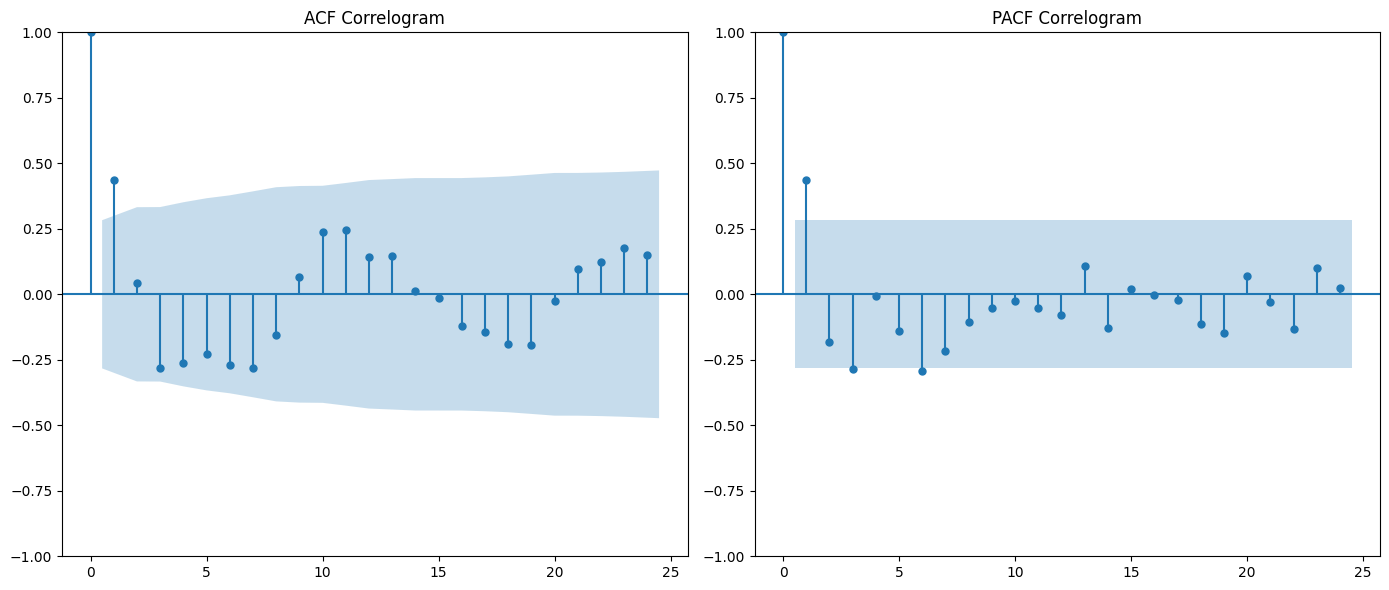

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Set maximum lags based on the number of observations
max_lags = 48 // 2

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plot_acf(monthly_df['Precipitation'].dropna(), lags=max_lags, ax=plt.gca())
plt.title('ACF Correlogram')

plt.subplot(1, 2, 2)
plot_pacf(monthly_df['Precipitation'].dropna(), lags=max_lags, ax=plt.gca())
plt.title('PACF Correlogram')

plt.tight_layout()
plt.show()


**Correct for non-stationarity (Differencing, logs)**

In [ ]:
monthly_df['dy1'] = monthly_df['Precipitation'].diff().dropna()


In [ ]:
monthly_df['dy2'] = monthly_df['dy1'].diff().dropna()


In [ ]:
import numpy as np
import pandas as pd

# Create a new DataFrame with only positive values
positive_df = monthly_df[monthly_df['Precipitation'] > 0].copy()

# Apply the log transformation to the new DataFrame
positive_df['log_Prec'] = np.log(positive_df['Precipitation'])

# You can now use positive_df for further analysis or plotting
print(positive_df.head())


            Precipitation   Temp Max  Temp Min      Wind Weather     Month  \
Date                                                                         
2012-01-31       5.590323   7.054839  1.541935  3.900000    rain  Jan 2012   
2012-02-29       3.182759   9.275862  3.203448  3.903448    rain  Feb 2012   
2012-03-31       5.903226   9.554839  2.838710  4.248387    rain  Mar 2012   
2012-04-30       2.270000  14.873333  5.993333  3.373333    rain  Apr 2012   
2012-05-31       1.683871  17.661290  8.190323  3.354839    rain  May 2012   

            Year  Precipitation_lag  Precipitation_lag1  Precipitation_lag2  \
Date                                                                          
2012-01-31  2012                NaN                 NaN                 NaN   
2012-02-29  2012           5.590323            5.590323                 NaN   
2012-03-31  2012           3.182759            3.182759            5.590323   
2012-04-30  2012           5.903226            5.903226   

**Differenced Variable for Stationarity**

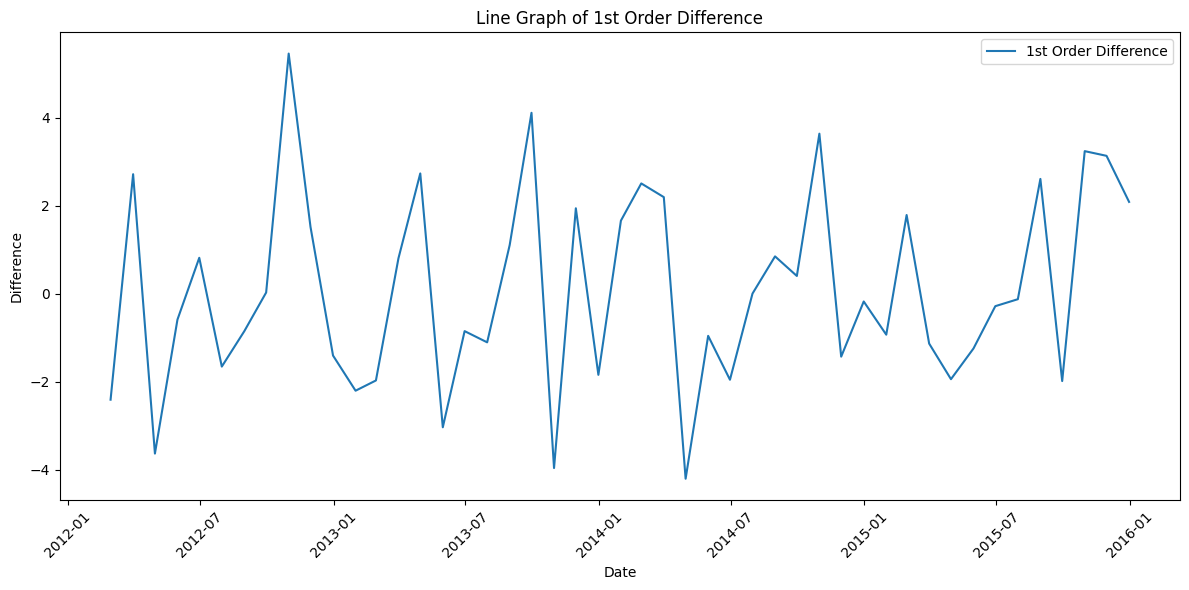

In [ ]:
# Ensure that the x and y data are aligned
x_data = monthly_df.index[1:]  # Exclude the first index to match the length of dy1
y_data = monthly_df['dy1'].dropna()  # Drop NaN values from dy1 if any

plt.figure(figsize=(12, 6))
plt.plot(x_data, y_data, label='1st Order Difference')
plt.title('Line Graph of 1st Order Difference')
plt.xlabel('Date')
plt.ylabel('Difference')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


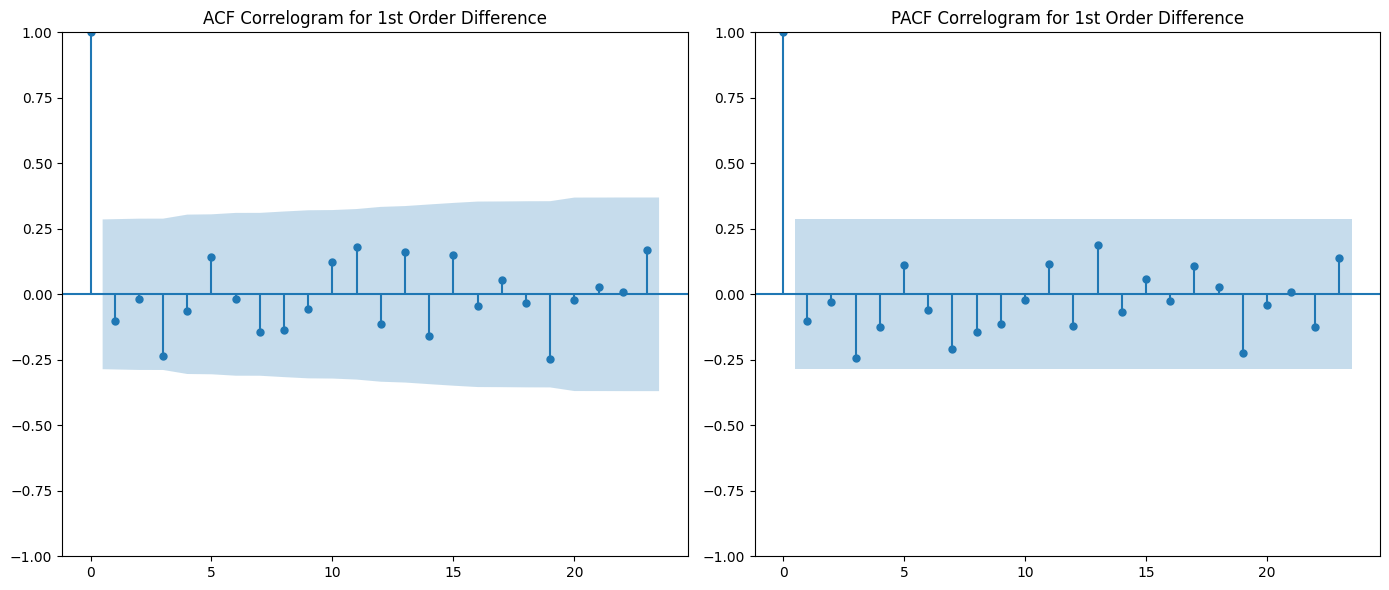

In [ ]:
plt.figure(figsize=(14, 6))

# Plot ACF with adjusted lags
plt.subplot(1, 2, 1)
plot_acf(monthly_df['dy1'].dropna(), lags=23, ax=plt.gca())
plt.title('ACF Correlogram for 1st Order Difference')

# Plot PACF with adjusted lags
plt.subplot(1, 2, 2)
plot_pacf(monthly_df['dy1'].dropna(), lags=23, ax=plt.gca())
plt.title('PACF Correlogram for 1st Order Difference')

plt.tight_layout()
plt.show()

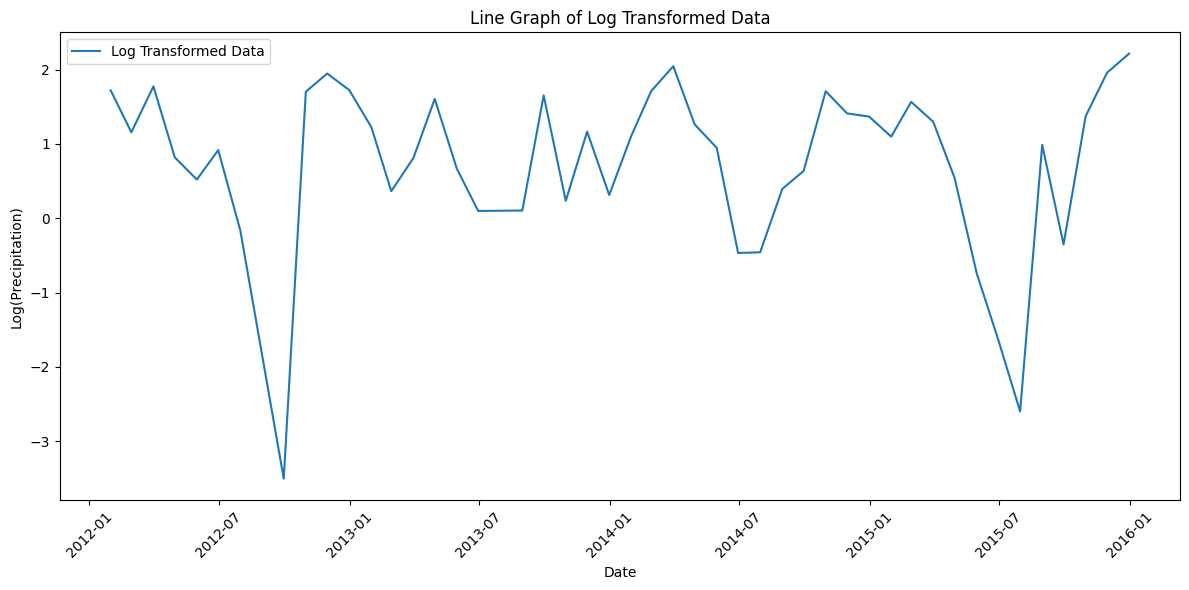

In [ ]:
# Plot the log-transformed data
plt.figure(figsize=(12, 6))
plt.plot(positive_df.index, positive_df['log_Prec'], label='Log Transformed Data')
plt.title('Line Graph of Log Transformed Data')
plt.xlabel('Date')
plt.ylabel('Log(Precipitation)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

**Unit Roots Test**

**Augmented Dickey-Fuller (ADF) Test**

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF Test
result = adfuller(monthly_df['Precipitation'].dropna(), autolag='AIC')
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])


ADF Statistic: -4.842185497399338
p-value: 4.513215022393617e-05
Critical Values: {'1%': -3.60098336718852, '5%': -2.9351348158036012, '10%': -2.6059629803688282}


**ADF Test with Lagged Differences and Trend Term**

In [ ]:
# Perform ADF Test with lagged differences and trend term
result = adfuller(monthly_df['Precipitation'].dropna(), autolag='AIC', regression='ct')  # 'ct' includes trend
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])


ADF Statistic: -4.732113542617488
p-value: 0.0006146276510636006
Critical Values: {'1%': -4.198435183325837, '5%': -3.5236066465953773, '10%': -3.1927730539313126}


**ADF Test with Regression Table**

In [ ]:
import statsmodels.api as sm

# Fit regression model to show detailed results
X = sm.add_constant(monthly_df['Precipitation'])
model = sm.OLS(monthly_df['Precipitation'], X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:          Precipitation   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.689e+32
Date:                Mon, 16 Sep 2024   Prob (F-statistic):               0.00
Time:                        18:08:39   Log-Likelihood:                 1614.8
No. Observations:                  48   AIC:                            -3226.
Df Residuals:                      46   BIC:                            -3222.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -8.327e-17   1.46e-16     -0.569

**Phillips-Perron (PP) Test**

In [ ]:
from arch.unitroot import PhillipsPerron

# Perform Phillips-Perron Test
pp_test = PhillipsPerron(monthly_df['Precipitation'].dropna())
print('Phillips-Perron Statistic:', pp_test.stat)
print('p-value:', pp_test.pvalue)
print('Critical Values:', pp_test.critical_values)


Phillips-Perron Statistic: -2.328126534352444
p-value: 0.16305698029161836
Critical Values: {'1%': -3.5778480370438146, '5%': -2.925338105429433, '10%': -2.6007735310095064}


**KPSS Test**

In [ ]:
from statsmodels.tsa.stattools import kpss

# Perform KPSS Test
kpss_result = kpss(monthly_df['Precipitation'].dropna(), regression='c')  # 'c' for constant
print('KPSS Statistic:', kpss_result[0])
print('p-value:', kpss_result[1])
print('Critical Values:', kpss_result[3])


KPSS Statistic: 0.044909042841089944
p-value: 0.1
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


<ipython-input-104-2285e49eb159>:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(monthly_df['Precipitation'].dropna(), regression='c')  # 'c' for constant


**Differencing**

In [ ]:
# 1st order difference
monthly_df['dy1'] = monthly_df['Precipitation'].diff()

# 2nd order difference
monthly_df['dy2'] = monthly_df['dy1'].diff()


**Differenced Variable for Stationarity**

ADF Statistic (dy1): -3.93152174056181
p-value (dy1): 0.0018147302601757439


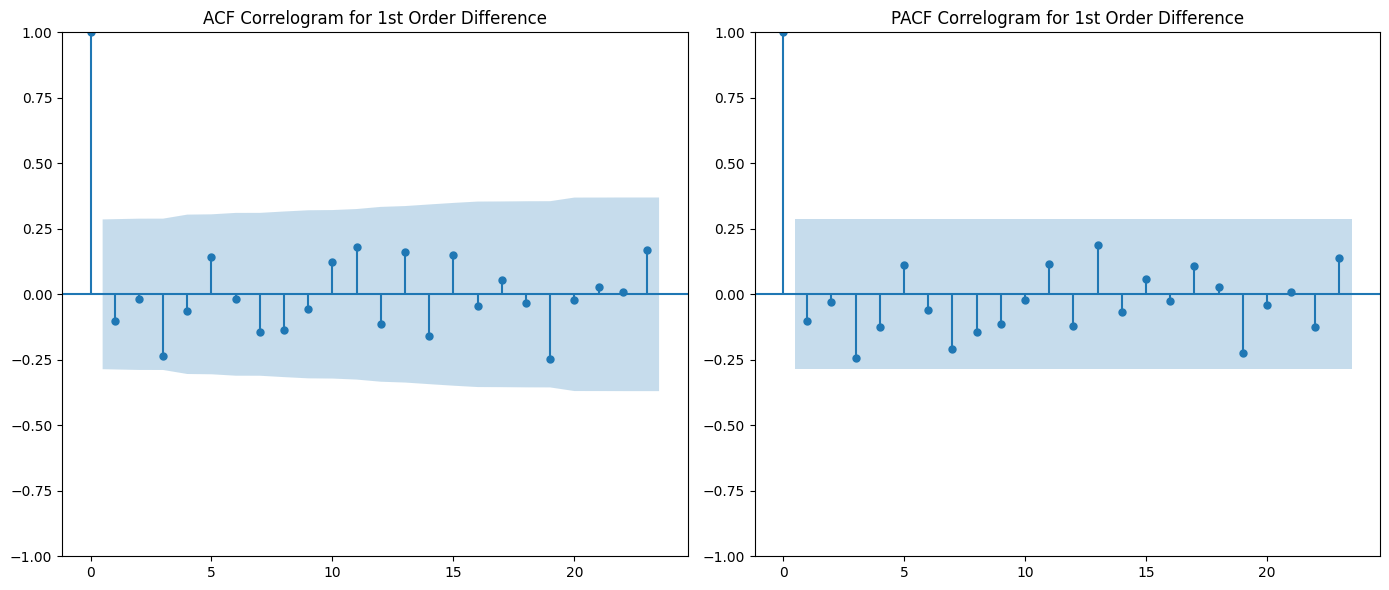

In [ ]:
# Perform ADF Test on differenced data
result = adfuller(monthly_df['dy1'].dropna(), autolag='AIC', regression='c')
print('ADF Statistic (dy1):', result[0])
print('p-value (dy1):', result[1])

# Plot ACF and PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(14, 6))

# ACF plot
plt.subplot(1, 2, 1)
plot_acf(monthly_df['dy1'].dropna(), lags=23, ax=plt.gca())
plt.title('ACF Correlogram for 1st Order Difference')

# PACF plot
plt.subplot(1, 2, 2)
plot_pacf(monthly_df['dy1'].dropna(), lags=23, ax=plt.gca())
plt.title('PACF Correlogram for 1st Order Difference')

plt.tight_layout()
plt.show()
